# 29. Hands-On Learning Activity (Link # 9) Done With Jupyter Notebook


# Introduction to Data Visualization using a Jupyter notebook

This Notebook is designed to provide a bird's eye view of some `Data Analysis packages.` The goal is not to give an in-depth explanation of each package's features but rather demonstrate the purpose of a few used Data Analysis packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

## Jupyter

[Jupyter](https://jupyter.org) is not strictly speaking an `ML package.` It provides a browser front-end connected to an instance of `IPython` which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for demonstrations and tutorials.

## Pandas

[Pandas](http://pandas.pydata.org) is a library that provides a set of tools for data analysis (Python Data Analysis Library). 

`Pandas dataframes` can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [28]:
import statsmodels.api as sm 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from statistics import mean
from matplotlib import style

# Reading data from a text file (tab-delimited)
data = pd.read_csv('c:/SAT-vs-University-GPA.txt',  sep='\t') 

# Give name to your variables
data.columns=['high_GPA','math_SAT','verb_SAT','comp_GPA','univ_GPA']

# Always check your data

In [29]:
print("Data Read", data)

Data Read      high_GPA  math_SAT  verb_SAT  comp_GPA  univ_GPA
0        3.45       643       589      3.76      3.52
1        2.78       558       512      2.87      2.91
2        2.52       583       503      2.54      2.40
3        3.67       685       602      3.83      3.47
4        3.24       592       538      3.29      3.47
..        ...       ...       ...       ...       ...
100      3.76       605       590      3.74      3.64
101      3.49       692       683      3.27      3.42
102      3.07       680       692      3.19      3.25
103      2.19       617       503      2.98      2.76
104      3.46       516       528      3.28      3.41

[105 rows x 5 columns]


## Statsmodels

[statsmodels](https://www.statsmodels.org/stable/index.html)  is a `Python` module that provides classes and functions for the estimation of many different `statistical models`, as well as for conducting statistical tests, and statistical data exploration.
### Ordinary Least Squares
[OrdinaryLeastSquares](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) estimates the parameters in a regression model by minimizing the sum of the squared residuals. 


## Numpy

[Numpy](http://www.numpy.org) is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop

In [30]:
# defining the variables 
x = data['comp_GPA'].tolist() # Pandas tolist() is used to convert a series to list
y = data['univ_GPA'].tolist() 

# A numpy array is a central data structure of the NumPy library. 
# The elements are all of the same type, referred to as the array dtype.
xs = np.array(x) # NumPy arrays are faster and more compact than Python lists.
ys = np.array(y)  

# adding the constant term (Our model needs an intercept so we add a column of 1s:)
x = sm.add_constant(x) 

# performing the regression    model  = sm.OLS(y,x)      
# and fitting the model        result = model.fit()      
result = sm.OLS(y, x).fit()

# Summary table (OLS regression) 

* See the similarity `of the values with the GRETL  OLS Model (values)` Link # 9, Page # 7
  
![title](http://www.mikojulj4.com/mab_usb/CH01/rbc3.gif)

In [31]:
# printing the summary table 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     768.5
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.44e-49
Time:                        22:46:04   Log-Likelihood:                 48.125
No. Observations:                 105   AIC:                            -92.25
Df Residuals:                     103   BIC:                            -86.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5924      0.094      6.282      0.0


# Regression Line:    y =  b  +  m * x 

* Variable `result`  has all the summary values
* `b = result.params[0] =` {{ result.params[0]  }}  And `m = result.params[1]  =` {{ result.params[1]  }}
* Furthermore, (below) we are going to calculate `b` and `m` again.
* Calculate the slope and intercept of a regression line. [calculate-the-slope-and-intercept](https://socratic.org/questions/how-do-you-calculate-the-slope-and-intercept-of-a-regression-line#282592)  


In [32]:
def best_fit_slope_and_intercept(xs,ys):   # define a function by using the command " def func1():"
            """
            Takes two Numpy arrays and returns the slope, and the y-intercept of a regression line.
        
            Arg:
            xs - a Numpy array
            ys - a Numpy array
            Returns (in this order):
            m - the slope.
            b - y-intercept.
            """
            m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /  #  from statistics import mean
            ((mean(xs)*mean(xs)) - mean(xs*xs))) 
                                                
            b = mean(ys) - m*mean(xs)  #  statistics module comes with functions like mean(), mode().
    
            return m, b

m, b = best_fit_slope_and_intercept(xs,ys) # call a function. The program will execute that function.


* `best_fit_slope_and_intercept()`  returns   m =  {{ m }}  and b = {{ b }} 
* `b = result.params[0] =` {{ result.params[0]  }}  And `m = result.params[1]  =` {{ result.params[1]  }}
* Compare the values of  `m` And `b` they are very close.  Yet, they are not the same.


In [33]:
# regression line is  y=mx+b. 
regression_line = []
for x in xs:        # The append() method in python adds a single item to the existing list
    regression_line.append((m*x)+b) 

# Display Actual and fitted Salary versus YearsExperience

## Matplotlib

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like, and an object-oriented API.

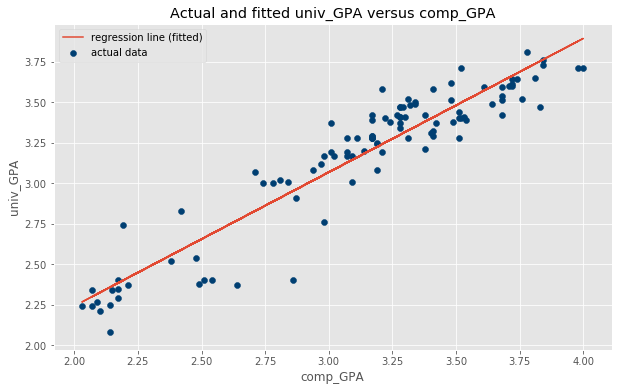

In [34]:
style.use('ggplot')   #  from matplotlib import style                                    
                      #  ggplot style, adjusts the style to emulate ggplot (a plotting package for R)

fig = plt.figure(figsize=(10, 6))                         
plt.title('Actual and fitted univ_GPA versus comp_GPA')  # import matplotlib.pyplot as plt

plt.xlabel("comp_GPA")  # Pyplot is a group of functions in the visualization package Matplotlib
plt.ylabel("univ_GPA")  # Its functions manipulate elements of a figure, such as creating a model
                        # creating a plotting area, plotting lines, adding plot labels, etc.
    
plt.plot(xs, regression_line, label='regression line (fitted)')
plt.scatter(xs,ys,color='#003F72',label='actual data')

plt.legend(loc="upper left")

plt.show()   # Display Actual and fitted univ_GPA versus comp_GPA

## Look at the similarity of this graph with the GRETL graph.  See (Link # 9, Page # 8)
![title](http://www.mikojulj4.com/mab_usb/CH01/rbc4.gif)